In [1]:
# This is a script to generate nice readable tables for the identified clusters 
# Import libraries
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

from astropy.io import ascii
from astropy.table import Table


import warnings
warnings.filterwarnings("once")

In [2]:
# Import data
cm_vel_all = pd.read_hdf('../data/dr3_near_vel_plxzp_g2_only.h5')
orb_param_all = pd.read_hdf('../data/dr3_orb_param_err_g2_only.h5')

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# Set all -9999 values in APOGEE and RAVE6 cnn [Fe/H] and alpha to np.nan for easier calculation later
ind_ap_999 = np.where(cm_vel_all.loc[:,'m_h_ap'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'m_h_r6c'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'m_h_ap17'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'m_h_ap'] = np.nan
cm_vel_all.loc[ind_r6c_999,'m_h_r6c'] = np.nan
cm_vel_all.loc[ind_ap17_999,'m_h_ap17'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'m_h_err_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'m_h_err_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'m_h_err_r6c'] < -100)[0]
ind_l6s_999 = np.where(cm_vel_all.loc[:,'m_h_err_l6s'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'m_h_err_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'m_h_err_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'m_h_err_r6c'] = np.nan
cm_vel_all.loc[ind_l6s_999,'m_h_err_l6s'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'alpha_m_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'alpha_m_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'alpha_m_r6c'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'alpha_m_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'alpha_m_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'alpha_m_r6c'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_r6c'] < -100)[0]
ind_l6s_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_l6s'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'alpha_m_err_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'alpha_m_err_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'alpha_m_err_r6c'] = np.nan
cm_vel_all.loc[ind_l6s_999,'alpha_m_err_l6s'] = np.nan

In [4]:
# calculate the columns for the scaled action diamond
orb_param_all['Jtot'] = np.sqrt(orb_param_all['Jphi']**2+orb_param_all['JR']**2+orb_param_all['Jz']**2)
orb_param_all['diamond_x']=orb_param_all['Jphi']/orb_param_all['Jtot']
orb_param_all['diamond_y']=(orb_param_all['Jz']-orb_param_all['JR'])/orb_param_all['Jtot']

# Calculate the error for Jtot and diamond_x/y
orb_param_all['e_Jtot'] = np.sqrt(orb_param_all['Jphi']**2*orb_param_all['e_Jphi']**2+orb_param_all['JR']**2*orb_param_all['e_JR']**2+orb_param_all['Jz']**2*orb_param_all['e_Jz']**2)/orb_param_all['Jtot']
orb_param_all['e_diamond_x']=np.sqrt(orb_param_all['Jtot']**2*orb_param_all['e_Jphi']**2+orb_param_all['e_Jtot']**2*orb_param_all['Jphi']**2)/orb_param_all['Jtot']**2
orb_param_all['e_diamond_y']=np.sqrt(orb_param_all['Jtot']**2*(orb_param_all['e_JR']**2+orb_param_all['e_Jz']**2)+orb_param_all['e_Jtot']**2*(orb_param_all['Jz']-orb_param_all['JR'])**2)/orb_param_all['Jtot']**2

# Calculate L_perp for clustering
orb_param_all['Lperp'] = np.sqrt(orb_param_all['Lx']**2+orb_param_all['Ly']**2)
orb_param_all['e_Lperp'] = np.sqrt(orb_param_all['Lx']**2*orb_param_all['e_Lx']**2+orb_param_all['Ly']**2*orb_param_all['e_Ly']**2)/orb_param_all['Lperp']

# This mean metallicity below is only used in the case when we actually want to cluster in or with a prior cut on metallicity
# To avoid systematic differences between spectroscopic surveys; don't mix metallicities from different surveys
# cm_vel_all['m_h_mean'] = np.nanmean(cm_vel_all[['m_h_ap17','m_h_l6s','m_h_r6c','m_h_gl3']].values, axis=1).T
cm_vel_all['m_h_mean'], cm_vel_all['e_m_h_mean'] = cm_vel_all['m_h_ap17'], cm_vel_all['m_h_err_ap17'] 


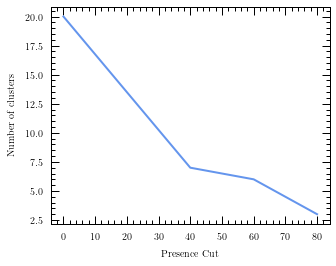

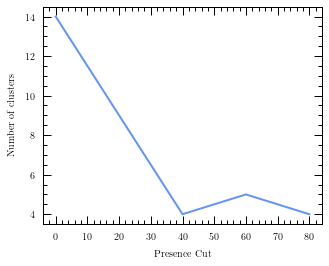

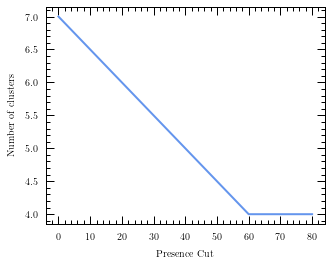

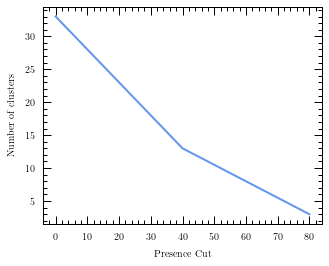

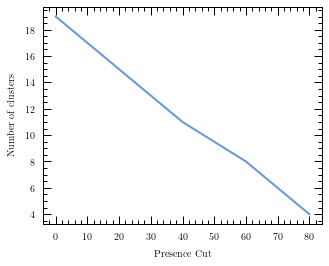

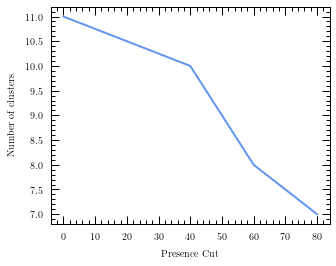

In [18]:
# Make number of clusters as a function of presence cut
for space in ['E_act','vel_cyl']:
    for zcut in ['2500','3000','3500']:
        data_dir = './'+space+'_'+zcut+'_data_20_20_err_abs/'
        plot_dir = './'+space+'_'+zcut+'_plot_20_20_err_abs/'
        N_clust_tmp = []
        for pcut in ['_','_cut_40_','_cut_60_','_cut_80_']:
            extratext = '_'+space+'_'+zcut+'_stacked_stars_in_clust'+pcut+'hdbscan_min_samples_20_min_clustsize_20_leaf'
            cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
            N_clust_tmp.append(len(cluster_id)-1)
        f = plt.figure(figsize=[5,4])
        plt.plot([0,40,60,80],N_clust_tmp)
        plt.xlabel(r'Presence Cut')
        plt.ylabel(r'Number of clusters')
        plt.show()
        f.savefig(plot_dir+space + '_' + zcut + '_N_clust_vs_presence_cut.pdf')

In [ ]:
# Make quick short summary plot for different spaces at diffrent presence cut with different colors
for space in ['E_act','vel_cyl']:
    for zcut in ['2500','3000','3500']:
        data_dir = './'+space+'_'+zcut+'_data_20_20_err_abs/'
        plot_dir = './'+space+'_'+zcut+'_plot_20_20_err_abs/'
        N_clust_tmp = []
        for pcut in ['_','_cut_40_','_cut_60_','_cut_80_']:
            extratext = '_'+space+'_'+zcut+'_stacked_stars_in_clust'+pcut+'hdbscan_min_samples_20_min_clustsize_20_leaf'
            cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
            N_clust_tmp.append(len(cluster_id)-1)
        f = plt.figure(figsize=[5,4])
        plt.plot([0,40,60,80],N_clust_tmp)
        plt.xlabel(r'Presence Cut')
        plt.ylabel(r'Number of clusters')
        plt.show()
        f.savefig(plot_dir+space + '_' + zcut + '_N_clust_vs_presence_cut.pdf')

In [10]:
# Import the source_id of the identified clusters
data_dir = './E_act_2500_data_20_20_err_abs/'
extratext = '_E_act_2500_stacked_stars_in_clust_hdbscan_min_samples_20_min_clustsize_20_leaf'
cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
# cluster_ind = np.load(data_dir + 'member_mask' + extratext + '.npy',allow_pickle=True)
cluster_col = np.load(data_dir + 'color' + extratext + '.npy',allow_pickle=True)
# cluster_nstar = np.load(data_dir + 'member_nstar' + extratext + '.npy',allow_pickle=True)
# cluster_means = np.load(data_dir + 'member_means' + extratext + '.npy',allow_pickle=True)
# cluster_dispersions = np.load(data_dir + 'member_disps' + extratext + '.npy',allow_pickle=True)

In [17]:
cm_vel_all.columns

Index(['index', 'source_id', 'ra', 'dec', 'm_h_ap', 'm_h_err_ap', 'm_h_flg_ap',
       'alpha_m_ap', 'alpha_m_err_ap', 'alpha_m_flg_ap', 'm_h_l6s',
       'm_h_err_l6s', 'm_h_flg_l6s', 'alpha_m_l6s', 'alpha_m_err_l6s',
       'alpha_m_flg_l6s', 'm_h_gl3', 'm_h_err_gl3', 'm_h_flg_gl3',
       'alpha_m_gl3', 'alpha_m_err_gl3', 'alpha_m_flg_gl3', 'm_h_r6',
       'alpha_m_r6', 'm_h_err_r6', 'alpha_m_err_r6', 'XGC', 'YGC', 'ZGC',
       'm_h_r6c', 'alpha_m_r6c', 'm_h_err_r6c', 'alpha_m_err_r6c',
       'm_h_flg_r6c', 'alpha_m_flg_r6c', 'qual_flag', 'bin_flag', 'parallax',
       'parallax_error', 'parallax_zpcorr', 'l', 'b', 'XGCerr', 'YGCerr',
       'ZGCerr', 'U_g2', 'Uerr_g2', 'V_g2', 'Verr_g2', 'W_g2', 'Werr_g2',
       'UVcov_g2', 'UWcov_g2', 'VWcov_g2', 'v_forder_g2', 'vr_g2', 'vphi_g2',
       'vz_g2', 'vrerr_g2', 'vphierr_g2', 'vzerr_g2', 'vrphicov_g2',
       'vrzcov_g2', 'vphizcov_g2', 'm_h_ap17', 'm_h_err_ap17', 'alpha_m_ap17',
       'alpha_m_err_ap17', 'aspcap_flg_ap17', 'm_h_

In [6]:
# count how many clusters are identified. Note the last one is always noise
print("Number of identified clusters:",len(cluster_id)-1)

Number of identified clusters: 20


In [19]:
str(cluster_col[1][0:3])

'[0.9254902  0.88235294 0.2       ]'

In [7]:
# Create a dataframe to hold all the output
# df_output = pd.DataFrame({'Cluster ID': np.arange(len(cluster_id)-1),\
#                           'Color': [np.nan]*(len(cluster_id)-1),\
#                           '$v_{R}$': np.zeros(len(cluster_id)-1),\
#                           '$\sigma_{v_{R}}$': np.zeros(len(cluster_id)-1),\
#                           '$v_{\phi}$': np.zeros(len(cluster_id)-1),\
#                           '$\sigma_{v_{\phi}}$': np.zeros(len(cluster_id)-1),\
#                           '$v_{z}$': np.zeros(len(cluster_id)-1),\
#                           '$\sigma_{v_{z}}$': np.zeros(len(cluster_id)-1),\
#                           '$N_{star}$': np.zeros(len(cluster_id)-1,dtype=int)})

df_output = pd.DataFrame({'Cluster ID': np.arange(len(cluster_id)-1),\
                          'Color': [np.nan]*(len(cluster_id)-1),\
                          '$J_{R}$': np.zeros(len(cluster_id)-1),\
                          '$\sigma_{J_{R}}$': np.zeros(len(cluster_id)-1),\
                          '$J_{\phi}$': np.zeros(len(cluster_id)-1),\
                          '$\sigma_{J_{\phi}}$': np.zeros(len(cluster_id)-1),\
                          '$J_{z}$': np.zeros(len(cluster_id)-1),\
                          '$\sigma_{J_{z}}$': np.zeros(len(cluster_id)-1),\
                          '$E_{tot}$': np.zeros(len(cluster_id)-1),\
                          '$\sigma_{E_{tot}}$': np.zeros(len(cluster_id)-1),\
                          '$N_{star}$': np.zeros(len(cluster_id)-1,dtype=int)})


<>:15: DeprecationWarning: invalid escape sequence \s
<>:16: DeprecationWarning: invalid escape sequence \p


In [14]:
cluster_ind_match = []

In [15]:
# Search the corresponding index list
for i in range(len(cluster_id)-1):
    source_id_tmp = cluster_id[i]
    ind_tmp = np.array([np.where(cm_vel_all['source_id'] == s_id)[0][0] for s_id in source_id_tmp])
    cluster_ind_match.append(ind_tmp)
    
    converted_col = [str(element) for element in cluster_col[i][0:3]]
    df_output.loc[i,'Color'] = ",".join(converted_col)
    
#     df_output.loc[i,'$v_{R}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vr_g2'])
#     df_output.loc[i,'$\sigma_{v_{R}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vr_g2'])
    
#     df_output.loc[i,'$v_{\phi}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vphi_g2'])
#     df_output.loc[i,'$\sigma_{v_{\phi}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vphi_g2'])
    
#     df_output.loc[i,'$v_{z}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vz_g2'])
#     df_output.loc[i,'$\sigma_{v_{z}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vz_g2'])

    df_output.loc[i,'$J_{R}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'JR'])
    df_output.loc[i,'$\sigma_{J_{R}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'JR'])
    
    df_output.loc[i,'$J_{\phi}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jphi'])
    df_output.loc[i,'$\sigma_{J_{\phi}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jphi'])
    
    df_output.loc[i,'$J_{z}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jz'])
    df_output.loc[i,'$\sigma_{J_{z}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jz'])
    
    df_output.loc[i,'$E_{tot}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Etot'])
    df_output.loc[i,'$\sigma_{E_{tot}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Etot'])
    
    # Additional columns as needed
    df_output.loc[i,'$ecc$'] = np.nanmean(orb_param_all.loc[ind_tmp,'ecc'])
    df_output.loc[i,'$[Fe/H]$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'m_h_mean'])
    
    
    df_output.loc[i,'$N_{star}$'] = int(len(source_id_tmp))

<>:20: DeprecationWarning: invalid escape sequence \s
<>:22: DeprecationWarning: invalid escape sequence \p
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice


In [12]:
# Round the decimals
# for (col, dp) in zip(['$v_{R}$','$\sigma_{v_{R}}$','$v_{\phi}$','$\sigma_{v_{\phi}}$','$v_{z}$','$\sigma_{v_{z}}$'],[2,2,2,2,2,2]):
#     df_output[col] = df_output[col].round(dp)
    
for (col, dp) in zip(['$J_{R}$','$\sigma_{J_{R}}$','$J_{\phi}$','$\sigma_{J_{\phi}}$','$J_{z}$','$\sigma_{J_{z}}$','$E_{tot}$','$\sigma_{E_{tot}}$'],[2,2,2,2,2,2,2,2]):
    df_output[col] = df_output[col].round(dp)

# Process the color column
df_output['Color'] = '\textcolor[rgb]{' + df_output['Color'] + '}{$\blacksquare$}'

In [13]:
df_output

,Cluster ID,Color,$J_{R}$,$\sigma_{J_{R}}$,$J_{\phi}$,$\sigma_{J_{\phi}}$,$J_{z}$,$\sigma_{J_{z}}$,$E_{tot}$,$\sigma_{E_{tot}}$,$N_{star}$
0,0,"\textcolor[rgb]{0.00392156862745098,0.45098039...",786.88,182.06,2330.44,381.34,287.02,37.01,-94899.03,4175.74,64
1,1,"\textcolor[rgb]{0.8352941176470589,0.368627450...",362.74,106.13,-1135.07,259.54,1123.01,75.06,-107640.00,4439.87,56
2,2,"\textcolor[rgb]{0.984313725490196,0.6862745098...",143.59,64.18,-69.29,178.10,1020.09,97.83,-139463.08,3012.97,60
3,3,"\textcolor[rgb]{0.33725490196078434,0.70588235...",250.57,81.79,-272.64,190.06,635.84,47.41,-143183.52,2258.12,82
4,4,"\textcolor[rgb]{0.00784313725490196,0.61960784...",1666.24,115.41,-25.45,135.42,93.24,44.71,-109319.24,2367.60,86
5,5,"\textcolor[rgb]{0.792156862745098,0.5686274509...",982.57,146.56,-78.32,138.00,184.71,15.25,-128300.01,5840.91,153
6,6,"\textcolor[rgb]{0.9254901960784314,0.882352941...",120.81,27.40,-784.15,71.29,427.67,29.33,-140864.77,1146.54,64
7,7,"\textcolor[rgb]{0.8705882352941177,0.560784313...",517.93,104.82,-138.87,161.31,234.36,36.36,-147597.75,4187.14,779
8,8,"\textcolor[rgb]{0.8,0.47058823529411764,0.7372...",168.60,21.62,-674.13,39.92,229.26,12.48,-150890.61,1295.34,53
9,9,"\textcolor[rgb]{0.5803921568627451,0.580392156...",229.41,24.49,-1635.04,56.24,132.36,9.68,-122530.04,1221.54,105


In [ ]:
# Make 1-D eccentricity and metallicity histograms


In [34]:
# Examine to make sure the velocities and indices are properly exported
i = 1
# print(cluster_ind[i],cluster_ind_match[i])
print(cluster_means[i],cluster_dispersions[i])
print(cluster_nstar)

[-268.18217383  -13.73341053 -112.67371452] [ 7.76976049 14.48062901 13.75893663]
[6.3000e+01 3.1000e+01 6.6000e+01 3.0000e+01 2.3000e+01 7.1000e+01
 8.4000e+01 2.6000e+01 3.4000e+01 1.4700e+02 2.2000e+01 2.0000e+01
 3.6000e+01 4.0000e+01 2.9000e+01 1.4100e+02 1.6700e+02 2.5000e+01
 1.1700e+02 2.9000e+01 3.6000e+01 2.2000e+01 5.3000e+01 3.8000e+01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.6571e+04]


In [83]:
t = Table.from_pandas(df_output)

In [84]:
ascii.write(t, 'clustering_result_tables/' + extratext + '_tex.txt', overwrite=True,format='aastex')

In [34]:
df_output.to_csv(data_dir+'mean_result_table.csv')

In [35]:
# loop through the sampling realizations and outputs all tables to the data directory
E_act_flg = True
vel_cyl_flg = False

for j in range(100):
    extratext = '_0217_g2only_err_abs_cut_zmax_cut_2500_act_etot_hdbscan_min_samples_20_min_clustsize_20_leaf_samp_' + str(j)
    cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
    cluster_ind = np.load(data_dir + 'member_mask' + extratext + '.npy',allow_pickle=True)
    cluster_col = np.load(data_dir + 'color' + extratext + '.npy',allow_pickle=True)
    cluster_nstar = np.load(data_dir + 'member_nstar' + extratext + '.npy',allow_pickle=True)
    cluster_means = np.load(data_dir + 'member_means' + extratext + '.npy',allow_pickle=True)
    cluster_dispersions = np.load(data_dir + 'member_disps' + extratext + '.npy',allow_pickle=True)
    
    # count how many clusters are identified. Note the last one is always noise
    print("Number of identified clusters for realization",j,":",len(cluster_id)-1)
    
    # Create a dataframe to hold all the output
    if vel_cyl_flg:
        df_output = pd.DataFrame({'Cluster ID': np.arange(len(cluster_id)-1),\
                                  'Color': [np.nan]*(len(cluster_id)-1),\
                                  '$v_{R}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{v_{R}}$': np.zeros(len(cluster_id)-1),\
                                  '$v_{\phi}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{v_{\phi}}$': np.zeros(len(cluster_id)-1),\
                                  '$v_{z}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{v_{z}}$': np.zeros(len(cluster_id)-1),\
                                  '$N_{star}$': np.zeros(len(cluster_id)-1,dtype=int)})
    
    if E_act_flg:
        df_output = pd.DataFrame({'Cluster ID': np.arange(len(cluster_id)-1),\
                                  'Color': [np.nan]*(len(cluster_id)-1),\
                                  '$J_{R}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{J_{R}}$': np.zeros(len(cluster_id)-1),\
                                  '$J_{\phi}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{J_{\phi}}$': np.zeros(len(cluster_id)-1),\
                                  '$J_{z}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{J_{z}}$': np.zeros(len(cluster_id)-1),\
                                  '$E_{tot}$': np.zeros(len(cluster_id)-1),\
                                  '$\sigma_{E_{tot}}$': np.zeros(len(cluster_id)-1),\
                                  '$N_{star}$': np.zeros(len(cluster_id)-1,dtype=int)})
    
    cluster_ind_match = []
    
    # Search the corresponding index list
    if vel_cyl_flg:
        for i in range(len(cluster_id)-1):
            source_id_tmp = cluster_id[i]
            ind_tmp = np.array([np.where(cm_vel_all['source_id'] == s_id)[0][0] for s_id in source_id_tmp])
            cluster_ind_match.append(ind_tmp)

            converted_col = [str(element) for element in cluster_col[i][0:3]]
            df_output.loc[i,'Color'] = ",".join(converted_col)

            df_output.loc[i,'$v_{R}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vr_g2'])
            df_output.loc[i,'$\sigma_{v_{R}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vr_g2'])

            df_output.loc[i,'$v_{\phi}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vphi_g2'])
            df_output.loc[i,'$\sigma_{v_{\phi}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vphi_g2'])

            df_output.loc[i,'$v_{z}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vz_g2'])
            df_output.loc[i,'$\sigma_{v_{z}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vz_g2'])

            df_output.loc[i,'$N_{star}$'] = int(len(source_id_tmp))
        
        # Round the decimals
        for (col, dp) in zip(['$v_{R}$','$\sigma_{v_{R}}$','$v_{\phi}$','$\sigma_{v_{\phi}}$','$v_{z}$','$\sigma_{v_{z}}$'],[2,2,2,2,2,2]):
            df_output[col] = df_output[col].round(dp)

    if E_act_flg:
        for i in range(len(cluster_id)-1):
            source_id_tmp = cluster_id[i]
            ind_tmp = np.array([np.where(cm_vel_all['source_id'] == s_id)[0][0] for s_id in source_id_tmp])
            cluster_ind_match.append(ind_tmp)

            converted_col = [str(element) for element in cluster_col[i][0:3]]
            df_output.loc[i,'Color'] = ",".join(converted_col)

            df_output.loc[i,'$J_{R}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'JR'])
            df_output.loc[i,'$\sigma_{J_{R}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'JR'])

            df_output.loc[i,'$J_{\phi}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jphi'])
            df_output.loc[i,'$\sigma_{J_{\phi}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jphi'])

            df_output.loc[i,'$J_{z}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jz'])
            df_output.loc[i,'$\sigma_{J_{z}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jz'])

            df_output.loc[i,'$E_{tot}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Etot'])
            df_output.loc[i,'$\sigma_{E_{tot}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Etot'])


            df_output.loc[i,'$N_{star}$'] = int(len(source_id_tmp))
            
            
        # Round the decimals    
        for (col, dp) in zip(['$J_{R}$','$\sigma_{J_{R}}$','$J_{\phi}$','$\sigma_{J_{\phi}}$','$J_{z}$','$\sigma_{J_{z}}$','$E_{tot}$','$\sigma_{E_{tot}}$'],[2,2,2,2,2,2,2,2]):
            df_output[col] = df_output[col].round(dp)
        
    # Process the color column
    df_output['Color'] = '\textcolor[rgb]{' + df_output['Color'] + '}{$\blacksquare$}'
    
    df_output.to_csv(data_dir+'mean_result_table_samp_'+str(j)+'.csv')

<>:22: DeprecationWarning: invalid escape sequence \s
<>:23: DeprecationWarning: invalid escape sequence \p


Number of identified clusters for realization 0 : 13
Number of identified clusters for realization 1 : 10
Number of identified clusters for realization 2 : 11
Number of identified clusters for realization 3 : 16
Number of identified clusters for realization 4 : 8
Number of identified clusters for realization 5 : 10
Number of identified clusters for realization 6 : 12
Number of identified clusters for realization 7 : 12
Number of identified clusters for realization 8 : 10
Number of identified clusters for realization 9 : 10
Number of identified clusters for realization 10 : 11
Number of identified clusters for realization 11 : 9
Number of identified clusters for realization 12 : 12
Number of identified clusters for realization 13 : 9
Number of identified clusters for realization 14 : 10
Number of identified clusters for realization 15 : 15
Number of identified clusters for realization 16 : 9
Number of identified clusters for realization 17 : 9
Number of identified clusters for realizati

In [26]:
cluster_col

array([[0.00392157, 0.45098039, 0.69803922, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.3372549 , 0.70588235, 0.91372549, 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.9254902 , 0.88235294, 0.2       , 1.        ],
       [0.58039216, 0.58039216, 0.58039216, 1.        ],
       [0.58039216, 0.58039216, 0.58039216, 1.        ],
       [0.58039216, 0.58039216, 0.58039216, 1.        ],
       [0.58039216, 0.58039216,

In [69]:
# Make 1d histogram
def plot_1d_hist(df_vel,df_orb,ind_list,c_list,title,legends,list_mask=False,filename=None,bg=False,ds=True,ind_add_cut=[],ind_bg=[]):
    if len(ind_add_cut) == 0 and list_mask == True:
        ind_add_cut = ind_cut
    
    f = plt.figure(figsize=[10,10])
    
#     plt.suptitle(title)
    
    # Set the plotting parameters
    plt.subplot(2,2,1)
    plt.xlim([-600,600])
    plt.xlabel(r'$v_{R}$ [km/s]')
    plt.ylabel(r'$f(v_{R})$')
    
    # Make a fake dot for the legend
    for i in range(len(ind_list)):
        if ((len(ind_list[i]) < 0.1*len(df_vel)) or (len(ind_list) == 1)) and bg == False:
            mkr='*'
            ec='k'
        else:
            mkr='.'
            ec=c_list[i][0]
        try:
            # Check if needs downsampling; if so, flag it in legend
            if len(ind_list[i]) > 5000 and ds == True:
                plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i]+'_sp',marker=mkr,edgecolors=ec)
            else:
                plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i],marker=mkr,edgecolors=ec)
        except IndexError:
            print("Cluster number:",legends[i],'has zero stars.')
#     plt.legend(fontsize='small')
    
    plt.subplot(2,2,2)
    plt.xlim([-600,600])
    plt.xlabel(r'$v_{\phi}$ [km/s]')
    plt.ylabel(r'$f(v_{\phi})$')
    
    plt.subplot(2,2,3)
    plt.xlim([-600,600])
    plt.xlabel(r'$v_{z}$ [km/s]')
    plt.ylabel(r'$f(v_{z})$')
    
    plt.subplot(2,2,4)
    plt.xlim([-600,600])
    plt.xlabel(r'$|v|$ [km/s]')
    plt.ylabel(r'$f(|v|)$')

    # Add the backgrounds as needed
    if len(ind_bg) != 0:
        plt.subplot(2,2,1)
        sns.distplot(df_vel.loc[ind_bg,'vr_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color='k')


        # Plot vphi histogram
        plt.subplot(2,2,2)
        sns.distplot(df_vel.loc[ind_bg,'vphi_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color='k')


        # Plot vz histogram
        plt.subplot(2,2,3)
        sns.distplot(df_vel.loc[ind_bg,'vz_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color='k')


        # Plot vphi vs. vr; flip vphi
        plt.subplot(2,2,4)
        sns.distplot(np.sqrt(df_vel.loc[ind_bg,'vr_g2']**2+df_vel.loc[ind_bg,'vphi_g2']**2+df_vel.loc[ind_bg,'vz_g2']**2),hist=False,kde=True,bins=np.arange(0,600,10),color='k')
            
        
    
    for i in range(len(ind_list)):
        if list_mask == True:
            ind = ind_add_cut[ind_list[i]]
        else:
            ind = ind_list[i]
        color = c_list[i]
        
            
        if (len(ind) < 0.1*len(df_vel) or (len(ind_list) == 1)) and bg == False:
            mkr='.'
            ms=50
            al=1 
#             ec=['k']*len(ind)
            ec='none'
        else:
            mkr='.'
            ms=10
            al=0.1
            ec=color
        
        # Determine if there are more than 10000 data points, if so, down-sample it
        if len(ind) > 5000 and ds == True:
            ii = np.random.choice(len(ind),int(len(ind)/20),replace=False)
            ind = ind[ii]
            
            # Check to see if color list also needs to be downsampled
            if len(color) > len(ind): 
                color = color[ii]
        
        
        # Plot vr histogram
        plt.subplot(2,2,1)
        sns.distplot(df_vel.loc[ind,'vr_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color=color)
        plt.xlabel(r'$v_{R}$ [km/s]')
        
        
        # Plot vphi histogram
        plt.subplot(2,2,2)
        sns.distplot(df_vel.loc[ind,'vphi_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color=color)
        plt.xlabel(r'$v_{\phi}$ [km/s]')
        
        # Plot vz histogram
        plt.subplot(2,2,3)
        sns.distplot(df_vel.loc[ind,'vz_g2'],hist=False,kde=True,bins=np.arange(-600,600,10),color=color)
        plt.xlabel(r'$v_{z}$ [km/s]')
        
        # Plot v_tot histogram
        plt.subplot(2,2,4)
        sns.distplot(np.sqrt(df_vel.loc[ind,'vr_g2']**2+df_vel.loc[ind,'vphi_g2']**2+df_vel.loc[ind,'vz_g2']**2),hist=False,kde=True,bins=np.arange(0,600,10),color=color)
        plt.xlabel(r'$|v|$ [km/s]')
        
        
            
        
    f.tight_layout()
    plt.show()
    if filename != None:
        f.savefig(filename,layout='tight')

In [63]:
# sns.distplot(cm_vel_all.loc[ind_cut,'vphi_g2'],hist=False,kde=True,bins=vphi_bin, label=str(cutoff_l_arr[i])+'< zmax <'+str(cutoff_h_arr[i]))


Cluster number: 0 has zero stars.
Cluster number: 1 has zero stars.
Cluster number: 2 has zero stars.
Cluster number: 3 has zero stars.
Cluster number: 4 has zero stars.
Cluster number: 5 has zero stars.
Cluster number: 6 has zero stars.
Cluster number: 7 has zero stars.
Cluster number: 8 has zero stars.
Cluster number: 9 has zero stars.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

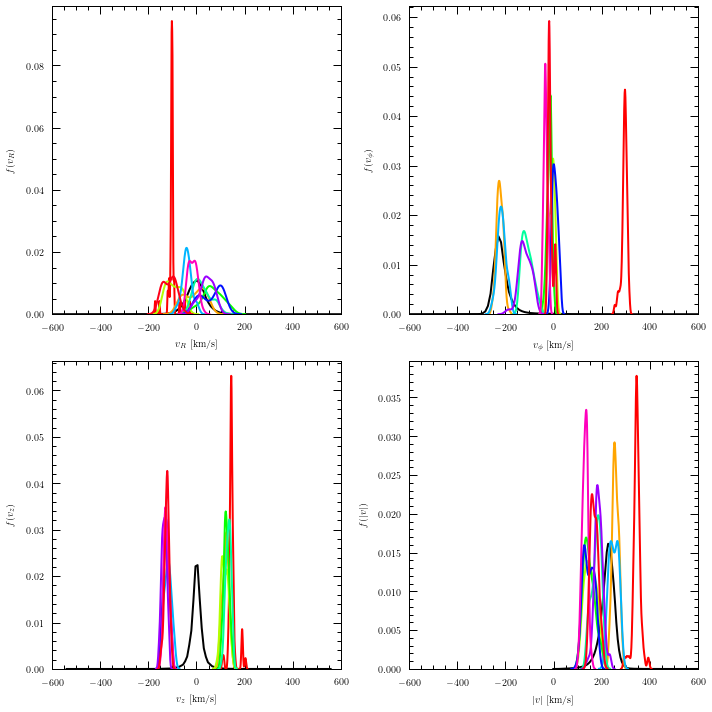

In [70]:
plot_1d_hist(cm_vel_all,orb_param_all,cluster_impot_ind,title='',c_list=[plt.cm.hsv(each) for each in np.linspace(0, 1, len(cluster_impot_ind))],\
             legends=np.arange(len(cluster_impot_ind)),list_mask=False,filename='action_plots/'+extratext+'_1d_hist.pdf',bg=False,ds=False,ind_add_cut=[],ind_bg=range(len(cm_vel_all)))